<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/10_nn_lr_autompg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기
-선형회귀 , 자동차 연비 데이터

In [35]:
cd /content/drive/MyDrive/Colab Notebooks/Github/Signiture

/content/drive/MyDrive/Colab Notebooks/Github/Signiture


In [36]:
!git config --global user.email 'prop30909@gmail.com'
!git config --global user.name 'YangHyunu'

In [37]:
!git add 10_nn_lr_autompg.ipynb
!git commit -m "Connect Google Colab and Drive"

[main d1e0c68] Connect Google Colab and Drive
 1 file changed, 1 insertion(+)
 create mode 100644 10_nn_lr_autompg.ipynb


In [38]:
!git push -u origin main

To https://github.com/YangHyunu/Signiture.git
 ! [rejected]        main -> main (fetch first)
error: failed to push some refs to 'https://github.com/YangHyunu/Signiture.git'
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [ ]:
pip install --q ipython-autotime

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np

In [ ]:
! wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv

--2024-07-07 06:22:28--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv.3’

auto-mpg.csv.3      100%[===================>]  17.71K  --.-KB/s    in 0.001s  

2024-07-07 06:22:28 (26.6 MB/s) - ‘auto-mpg.csv.3’ saved [18131/18131]



In [ ]:
auto = pd.read_csv('auto-mpg.csv')

In [ ]:
auto.shape

(398, 9)

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
auto.columns=[i.replace(' ','_') for i in auto.columns]

In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
#for column in auto.columns:
  #auto[column] = pd.to_numeric(auto[column],errors='coerce')

In [ ]:
auto['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [ ]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

'?'를 Nan값으로 변경

In [ ]:
auto.loc[auto['horsepower']=='?','horsepower'] =np.nan

In [ ]:
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', nan, '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
auto.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [ ]:
auto.dropna(inplace=True)

In [ ]:
auto['horsepower']=auto['horsepower'].astype('int')

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car_name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [ ]:
# origin과 , car_name칼럼은 드랍
auto=auto.drop(['origin','car_name'],axis=1)
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

## 트레인 테스트 분리

In [ ]:
from sklearn.model_selection import train_test_split
auto_train, auto_test = train_test_split(auto,test_size=0.2,random_state=42)
auto_train.shape, auto_test.shape

((313, 7), (79, 7))

## X,y split

In [ ]:
X_train = auto_train.drop('mpg',axis=1)
y_train = auto_train['mpg']
X_train.shape, y_train.shape

((313, 6), (313,))

## 스케일링

In [ ]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,5.482428,195.517572,104.594249,2986.124601,15.544089,76.207668
std,1.700446,103.766567,38.283669,841.133957,2.817864,3.630136
min,3.000000,70.000000,46.000000,1613.000000,8.000000,70.000000
25%,4.000000,105.000000,76.000000,2234.000000,13.500000,73.000000
50%,4.000000,151.000000,95.000000,2855.000000,15.500000,76.000000
75%,8.000000,302.000000,129.000000,3645.000000,17.300000,79.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
X_train_s= ss.fit_transform(X_train)
y_train = y_train.to_numpy()

In [ ]:
X_train_s.shape

(313, 6)

In [ ]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=64,activation='relu',input_shape=(6,)), # input_shape에 입력되는 입력값의 수와 X_train의 칼럼의 수는 같아야 한다!
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=1),


])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


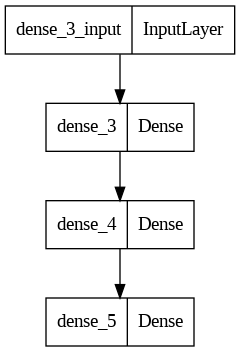

In [ ]:
from keras import utils
utils.plot_model(model)

2개의 은닉층과 출력층을 가진 모델로 구성

In [ ]:
model.compile(loss='mse', optimizer='adam',
 metrics=['mae', 'mse'])

In [ ]:
EPOCHS=100
BATCH_SIZE=32
history= model.fit(X_train_s,y_train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2
          )

Epoch 1/100
8/8 [==============================] - 1s 37ms/step - loss: 585.9217 - mae: 22.8594 - mse: 585.9217 - val_loss: 653.5610 - val_mae: 24.3180 - val_mse: 653.5610
Epoch 2/100
8/8 [==============================] - 0s 15ms/step - loss: 560.2494 - mae: 22.2334 - mse: 560.2494 - val_loss: 624.0005 - val_mae: 23.6667 - val_mse: 624.0005
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 529.5963 - mae: 21.4727 - mse: 529.5963 - val_loss: 587.3211 - val_mae: 22.8352 - val_mse: 587.3211
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 491.8847 - mae: 20.4896 - mse: 491.8847 - val_loss: 540.4725 - val_mae: 21.7373 - val_mse: 540.4725
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 443.9519 - mae: 19.2031 - mse: 443.9519 - val_loss: 482.3088 - val_mae: 20.3021 - val_mse: 482.3088
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 387.7408 - mae: 17.5951 - mse: 387.7408 - val_loss: 412.8832 - val_mae

In [ ]:
hist = history.history
hist

{'loss': [585.9216918945312,
  560.2493896484375,
  529.5962524414062,
  491.8846740722656,
  443.9519348144531,
  387.7407531738281,
  323.53759765625,
  258.50189208984375,
  192.75575256347656,
  133.90481567382812,
  89.02681732177734,
  62.061702728271484,
  50.89327621459961,
  47.182701110839844,
  44.43388366699219,
  41.15645980834961,
  37.865474700927734,
  35.13554382324219,
  32.733978271484375,
  30.459489822387695,
  28.36599349975586,
  26.560752868652344,
  24.973466873168945,
  23.346364974975586,
  22.123117446899414,
  20.91936492919922,
  19.848419189453125,
  18.9860897064209,
  18.03927230834961,
  17.427490234375,
  16.712068557739258,
  16.17392921447754,
  15.620798110961914,
  15.140575408935547,
  14.793560028076172,
  14.452615737915039,
  14.131941795349121,
  13.785738945007324,
  13.536624908447266,
  13.244466781616211,
  13.043405532836914,
  12.780121803283691,
  12.622303009033203,
  12.422699928283691,
  12.256996154785156,
  12.076239585876465,
  1

In [ ]:
epochs=history.epoch
import matplotlib.pyplot as plt

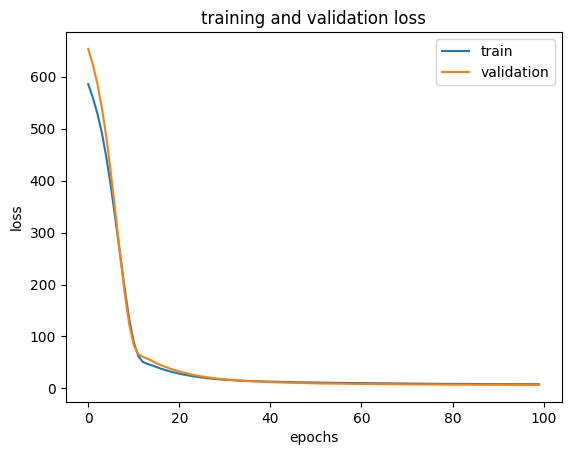

In [ ]:
plt.plot(epochs,hist['loss'],label='train')
plt.plot(epochs,hist['val_loss'],label='validation')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## 평가

In [ ]:
X_test = auto_test.drop('mpg',axis=1)
y_test =  auto_test['mpg']
X_test.shape, y_test.shape

((79, 6), (79,))

- 테스트 데이터 전처리

In [ ]:
X_test_s = ss.fit_transform(X_test)
y_test= y_test.to_numpy()

In [ ]:
print(type(X_test_s),type(y_test))
print(X_test.shape, y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(79, 6) (79,)


In [ ]:
y_pred = model.predict(X_test_s)

3/3 [==============================] - 0s 2ms/step


In [ ]:
y_pred[:5]

array([[25.409925],
       [22.588   ],
       [34.354618],
       [25.902649],
       [30.570469]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(f'MSE: {mean_squared_error(y_test,y_pred)}')

MSE: 7.434454970662017


Text(0, 0.5, 'Prediction')

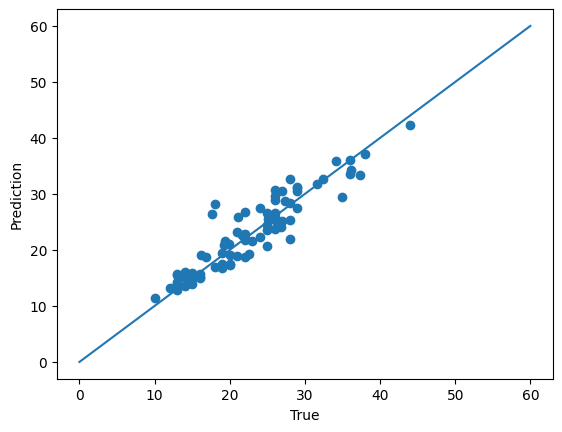

In [ ]:
plt.scatter(y_test,y_pred)
plt.plot([0,60],[0,60])
plt.xlabel('True')
plt.ylabel('Prediction')

# 선형 회귀 모형과 비교

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_s,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_s)

In [ ]:
ssr=((y_test - y_pred)**2).sum()

In [ ]:
ssr

838.938225316312

In [ ]:
print(f'MSE: {ssr/len(y_test)}')

MSE: 10.619471206535595


## 결론

In [ ]:
# 다층 신경망 모형이 선형 회귀 모형 보다 더 좋다.